In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import calendar
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data_file/Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Splitting train-test
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100, stratify=data['Converted'])
print('% train- ', round(train_data.shape[0]/data.shape[0], 3))
print('% test- ', round(test_data.shape[0]/data.shape[0], 3))

% train-  0.7
% test-  0.3


In [15]:
train = train_data.copy()
test = test_data.copy()

### **Data Understanding and Data Cleaning**

#### **1. Check the data types and basic cleaning**

In [16]:
# Find the data types of each columns 
train_data_types = {}
for col in train.columns:
    train_data_types[col] = str(train[col].dtype)

In [17]:
set(train_data_types.values())

{'float64', 'int64', 'object'}

- The application dataset contains columns with type- float, int and object.
- Let's check that if there any numeric column which has become object type

In [18]:
# Let's check that if there any numeric column which has become object type
object_cols = [key for key in train_data_types if train_data_types[key] == 'object']
train[object_cols].head(10)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,Lead Add Form,Reference,No,No,Email Opened,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,No,No,Email Opened
3109,c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b,Landing Page Submission,Direct Traffic,No,No,Form Submitted on Website,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Modified
3845,30e192d3-0d28-4a7c-9bc6-cca2e72084c4,API,Organic Search,No,No,SMS Sent,India,Media and Advertising,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,No,No,SMS Sent
1020,4765201f-2aca-4082-a7f1-0f5f59478987,API,Referral Sites,No,No,Olark Chat Conversation,India,"Banking, Investment And Insurance",Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,01.High,02.Medium,No,No,Modified
2903,d6edd084-5075-4177-b200-16496ba1f1bb,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Operations Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Mumbai,02.Medium,01.High,No,Yes,Modified
4138,8c39bbbe-6022-4fd1-a848-4285a3a2a586,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Finance Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,NaN,NaN,No,No,Modified
4396,787d57cb-2c32-4ace-b671-183b16348529,API,Olark Chat,Yes,No,Olark Chat Conversation,NaN,Select,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Already a student,Worst,No,No,Student of SomeSchool,Select,NaN,NaN,No,No,Modified
5834,b944b845-8983-43f6-a56b-a7f7c2a8f933,API,Google,No,No,Converted to Lead,India,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN,No,No,Modified
6197,090e8088-0b4a-42db-92ca-56212878264c,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,"Banking, Investment And Insurance",Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,NaN,NaN,No,Yes,Email Opened
7001,99ec2f8c-e06e-4d1b-accb-1b1f758f557f,API,Olark Chat,No,No,Email Opened,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,No,No,Email Opened


* there is no any numeric column which has become object type
* But few of the categorical columns contain "select"

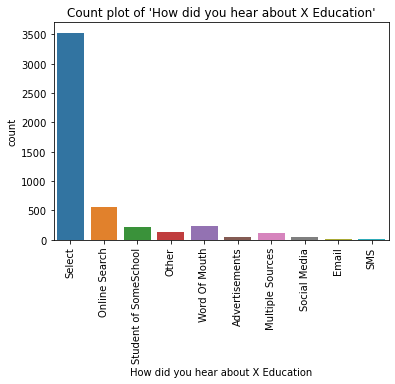

In [19]:
plt.title("Count plot of 'How did you hear about X Education'")
ax = sns.countplot(train['How did you hear about X Education'])
plt.xticks(rotation=90)
plt.show()

* There are a lot of rows which have 'Select' in their value. 
* Maybe some of these categorical fields hold drop-down menu's values. Because, in general 'select' is the default option in any drop-down.
* We would have to replace 'Select' with a Null.

In [20]:
# Let's see which all columns contain 'Select'
cols_with_select = [col for col in object_cols if train[col].str.lower().str.contains('select').any()]
train[cols_with_select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
7356,Marketing Management,Select,Potential Lead,Other Cities
3109,Human Resource Management,Online Search,Potential Lead,Mumbai
3845,Media and Advertising,Select,Potential Lead,Select
1020,"Banking, Investment And Insurance",Online Search,Select,Mumbai
2903,Operations Management,Select,Select,Mumbai


In [21]:
# Replace 'Select' with None 
for col in cols_with_select:
    train[col] = np.where(train[col].str.lower().str.contains('select'), None, train[col])

In [22]:
# Let's verify now if any object columns have 'Select'
cols_with_select = [col for col in object_cols if train[col].str.lower().str.contains('select').any()]
cols_with_select

[]

In [23]:
train[object_cols].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,Lead Add Form,Reference,No,No,Email Opened,NaN,Marketing Management,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,No,No,Email Opened
3109,c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b,Landing Page Submission,Direct Traffic,No,No,Form Submitted on Website,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Modified
3845,30e192d3-0d28-4a7c-9bc6-cca2e72084c4,API,Organic Search,No,No,SMS Sent,India,Media and Advertising,None,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,None,NaN,NaN,No,No,SMS Sent
1020,4765201f-2aca-4082-a7f1-0f5f59478987,API,Referral Sites,No,No,Olark Chat Conversation,India,"Banking, Investment And Insurance",Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,None,Mumbai,01.High,02.Medium,No,No,Modified
2903,d6edd084-5075-4177-b200-16496ba1f1bb,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Operations Management,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,None,Mumbai,02.Medium,01.High,No,Yes,Modified


In [24]:
# Let's check the numeric columns status
train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6468.000000,6468.000000,6364.00000,6468.000000,6364.000000,3532.000000,3532.000000
mean,617423.360235,0.385436,3.39472,481.188002,2.334926,14.317384,16.333805
std,23439.631077,0.486736,4.20350,547.374668,2.172071,1.384587,1.816368
min,579533.000000,0.000000,0.00000,0.000000,0.000000,7.000000,11.000000
25%,596698.500000,0.000000,1.00000,8.000000,1.000000,14.000000,15.000000
50%,615798.000000,0.000000,3.00000,241.000000,2.000000,14.000000,16.000000
75%,637856.500000,1.000000,5.00000,921.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,141.00000,2272.000000,55.000000,18.000000,20.000000


#### **2. Missing values**

In [25]:
# Find the % nulls in all the columns
def get_nulls_count(data_df):
    """
    Funtion to find the null counts and %nulls for all the columns of a given dataframe
    
    @param data_df: DataFrame
    """
    nulls_count = data_df.isnull().sum().reset_index().rename(columns={'index': 'columns', 0: 'null_count'})
    nulls_count['%_nulls_count'] = nulls_count['null_count']/data_df.shape[0] * 100
    return nulls_count

nulls_count = get_nulls_count(train.copy())

In [26]:
nulls_tmp = nulls_count[nulls_count['%_nulls_count']!=0]
nulls_tmp

,columns,null_count,%_nulls_count
3,Lead Source,26,0.401979
7,TotalVisits,104,1.607916
9,Page Views Per Visit,104,1.607916
10,Last Activity,81,1.252319
11,Country,1766,27.303649
12,Specialization,2372,36.672851
13,How did you hear about X Education,5086,78.633271
14,What is your current occupation,1900,29.375387
15,What matters most to you in choosing a course,1912,29.560915
24,Tags,2374,36.703772


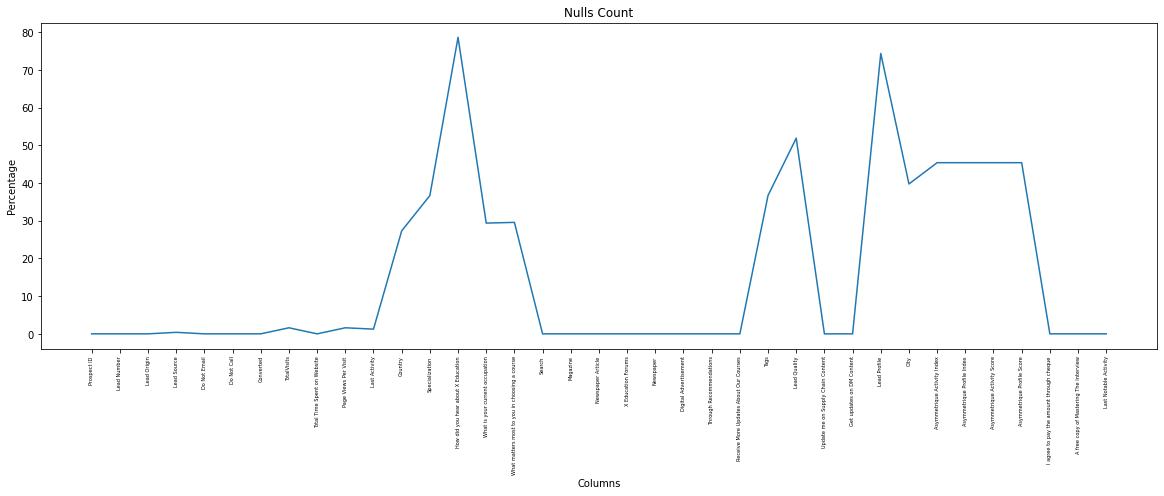

In [27]:
# Let's draw a line chart on %_nulls_count
plt.figure(figsize=[20,6])
plt.plot(nulls_count['columns'], nulls_count['%_nulls_count'])
plt.title('Nulls Count')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [28]:
# Let's check how many attributes having nulls more than 25%
_tmp_more_25 = nulls_tmp[nulls_tmp['%_nulls_count'] > 25]
print("Number of columns having more than 25% null values: ", _tmp_more_25.shape[0])
_tmp_more_25

Number of columns having more than 25% null values:  13


,columns,null_count,%_nulls_count
11,Country,1766,27.303649
12,Specialization,2372,36.672851
13,How did you hear about X Education,5086,78.633271
14,What is your current occupation,1900,29.375387
15,What matters most to you in choosing a course,1912,29.560915
24,Tags,2374,36.703772
25,Lead Quality,3356,51.886209
28,Lead Profile,4809,74.350649
29,City,2571,39.749536
30,Asymmetrique Activity Index,2936,45.392703


In [53]:
nulls_tmp[nulls_tmp['%_nulls_count'] > 30]

,columns,null_count,%_nulls_count
12,Specialization,2372,36.672851
13,How did you hear about X Education,5086,78.633271
24,Tags,2374,36.703772
25,Lead Quality,3356,51.886209
28,Lead Profile,4809,74.350649
29,City,2571,39.749536
30,Asymmetrique Activity Index,2936,45.392703
31,Asymmetrique Profile Index,2936,45.392703
32,Asymmetrique Activity Score,2936,45.392703
33,Asymmetrique Profile Score,2936,45.392703


In [29]:
train.shape

(6468, 37)

- There are 13 columns having more than 25% null values.
- Since the number of missing values in these columns are huge, we don't think they would add any sense to the dataset. So, we can drop these columns.

In [30]:
# Let's check how many attributes having nulls less than 25%
_tmp_less_25 = nulls_tmp[nulls_tmp['%_nulls_count'] <= 25]
print("Number of columns having less than and equal to 25% null values: ", _tmp_less_25.shape[0])
_tmp_less_25

Number of columns having less than and equal to 25% null values:  4


,columns,null_count,%_nulls_count
3,Lead Source,26,0.401979
7,TotalVisits,104,1.607916
9,Page Views Per Visit,104,1.607916
10,Last Activity,81,1.252319


* We can remove all of those columns that have more than 25% nulls.
* We can handle the missing values in all of those columns that have <=25% nulls.

#### Dropping columns having >25% null values

In [31]:
train.drop(_tmp_more_25['columns'].values, axis=1, inplace=True)

#### Handling missing values in all of those columns that have <=25% nulls.

In [32]:
train[_tmp_less_25['columns'].values].head()

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity
7356,Reference,0.0,0.00,Email Opened
3109,Direct Traffic,5.0,2.50,Form Submitted on Website
3845,Organic Search,3.0,3.00,SMS Sent
1020,Referral Sites,5.0,1.67,Olark Chat Conversation
2903,Direct Traffic,1.0,1.00,Converted to Lead


* Looks like it has both numeric as well as categorical fields

In [33]:
def fill_numeric_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the numeric columns by filling with the median value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    data_describe = data_df[tmp_df['columns']].describe()
    print("Started filling the missing values in the numeric columns.")
    print()
    for col in data_describe.columns:
        print(f"Type of {col}: {data_df[col].dtype}")
        if 'object' in str(data_df[col].dtype):
#             print("Expecting numeric type column, got some other type.")
            continue
        data_df[col] = data_df[col].fillna(data_describe[col]['50%'])
    return data_df


def fill_object_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the categorical/object columns by filling with the mode value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    print("Started filling the missing values in the text columns.")
    print()
    for col in tmp_df['columns']:
        print(f"Type of {col}: {data_df[col].dtype}")
        if 'object' not in str(data_df[col].dtype):
#             print("Expecting object type column, got some other type.")
            continue
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    return data_df

In [34]:
# Fill missing value for the numeric columns where %nulls is less than 10 
train = fill_numeric_missing_values(train.copy(), 25)

Started filling the missing values in the numeric columns.

Type of TotalVisits: float64
Type of Page Views Per Visit: float64


In [35]:
# Fill missing value for the categorical/text columns where %nulls is less than 10 
train = fill_object_missing_values(train.copy(), 25)

Started filling the missing values in the text columns.

Type of Lead Source: object
Type of Last Activity: object


In [36]:
# Let's check if any null still present?
get_nulls_count(train.copy())

,columns,null_count,%_nulls_count
0,Prospect ID,0,0.0
1,Lead Number,0,0.0
2,Lead Origin,0,0.0
3,Lead Source,0,0.0
4,Do Not Email,0,0.0
5,Do Not Call,0,0.0
6,Converted,0,0.0
7,TotalVisits,0,0.0
8,Total Time Spent on Website,0,0.0
9,Page Views Per Visit,0,0.0


In [37]:
train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,593016,Lead Add Form,Reference,No,No,1,0.0,0,0.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
3109,c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b,630042,Landing Page Submission,Direct Traffic,No,No,0,5.0,2,2.50,Form Submitted on Website,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
3845,30e192d3-0d28-4a7c-9bc6-cca2e72084c4,623207,API,Organic Search,No,No,1,3.0,99,3.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent
1020,4765201f-2aca-4082-a7f1-0f5f59478987,649316,API,Referral Sites,No,No,1,5.0,865,1.67,Olark Chat Conversation,No,No,No,No,No,No,No,No,No,No,No,No,Modified
2903,d6edd084-5075-4177-b200-16496ba1f1bb,631782,Landing Page Submission,Direct Traffic,No,No,0,1.0,62,1.00,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified


#### **3. Checking Outliers**

In [38]:
train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617423.360235,0.385436,3.388374,481.188002,2.329541
std,23439.631077,0.486736,4.169859,547.374668,2.154947
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596698.500000,0.000000,1.000000,8.000000,1.000000
50%,615798.000000,0.000000,3.000000,241.000000,2.000000
75%,637856.500000,1.000000,5.000000,921.000000,3.000000
max,660737.000000,1.000000,141.000000,2272.000000,55.000000


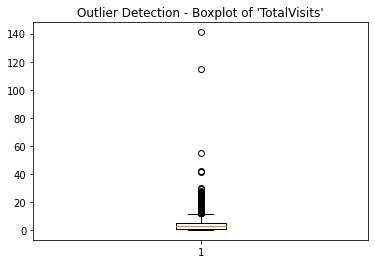

In [39]:
plt.title("Outlier Detection - Boxplot of 'TotalVisits'")
plt.boxplot(train['TotalVisits'])
plt.show()

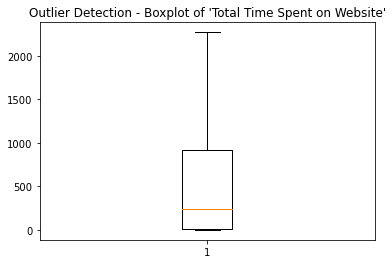

In [40]:
plt.title("Outlier Detection - Boxplot of 'Total Time Spent on Website'")
plt.boxplot(train['Total Time Spent on Website'])
plt.show()

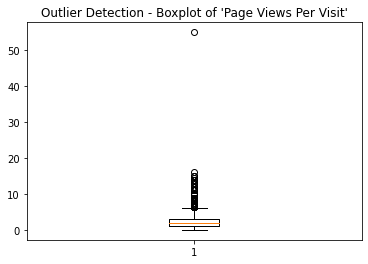

In [41]:
plt.title("Outlier Detection - Boxplot of 'Page Views Per Visit'")
plt.boxplot(train['Page Views Per Visit'])
plt.show()

* 'Total Time Spent on Website' looks completely fine.
* 'TotalVisits and 'Page Views Per Visit' have 1-2 records that are a bit off but not too much. So, we we can ignore.

In [42]:
train.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,593016,Lead Add Form,Reference,No,No,1,0.0,0,0.0,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


#### **4. Analysing the data**

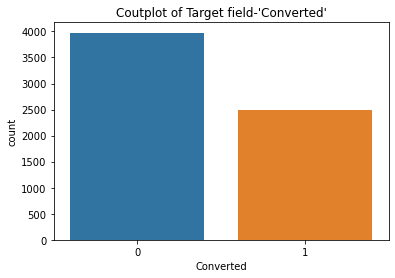

In [43]:
# check the distribution of TARGET variable
plt.title("Coutplot of Target field-'Converted'")
sns.countplot(train['Converted'])
plt.show()

In [44]:
train['Converted'].value_counts(normalize=True)

0    0.614564
1    0.385436
Name: Converted, dtype: float64

In [45]:
# Find the data types of each columns 
train_data_types = {}
for col in train.columns:
    train_data_types[col] = str(train[col].dtype)
    
object_cols = [key for key in train_data_types if train_data_types[key] == 'object' and key != 'Prospect ID']

In [54]:
# train[object_cols].head()

In [47]:
object_cols = ['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [48]:
for col in object_cols:
    print(col, len(train[col].unique()))

Do Not Email 2
Do Not Call 2
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Update me on Supply Chain Content 1
Get updates on DM Content 1
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2


In [49]:
train['Digital Advertisement'].value_counts()

No     6466
Yes       2
Name: Digital Advertisement, dtype: int64

<AxesSubplot:ylabel='Do Not Call'>

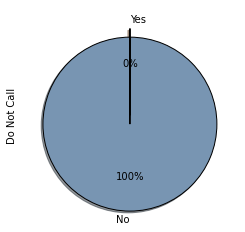

In [50]:
train['Do Not Call'].value_counts().plot.pie(autopct="%1.0f%%",
                                         colors=["#7895B2", "#FD841F"],
                                         startangle=90,
                                         wedgeprops={"linewidth":1, "edgecolor":"k"},
                                         shadow=True, 
                                         explode=[0.1, 0])

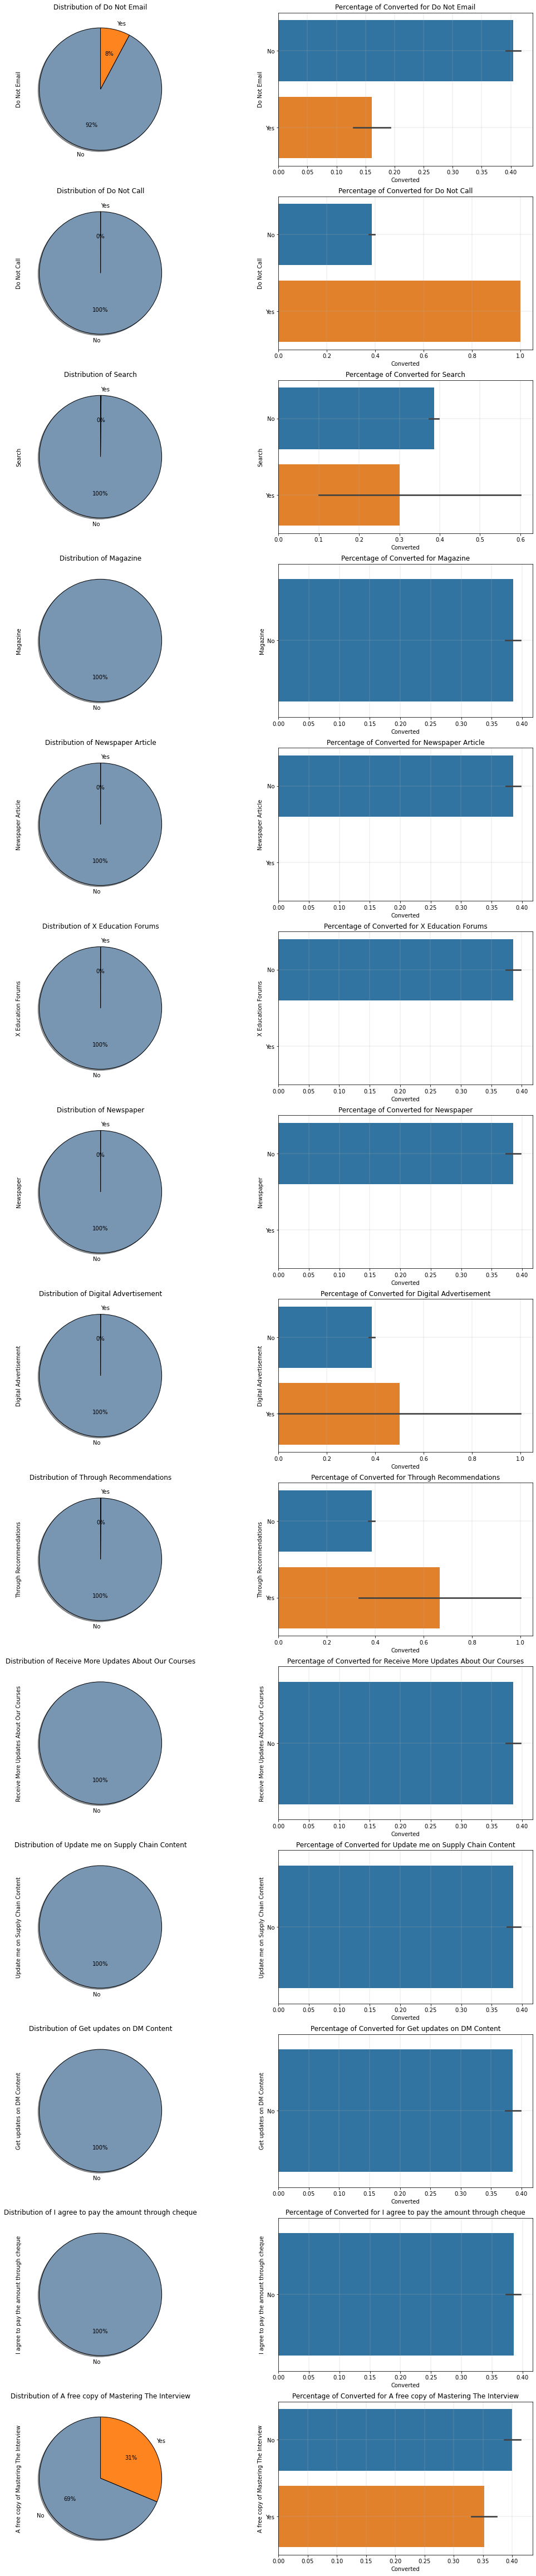

In [51]:
object_cols = ['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

index = 1
plt.figure(figsize=(18, 6 * len(object_cols)))
for col in object_cols:
    plt.subplot(len(object_cols), 2, index)
    train[col].value_counts().plot.pie(autopct="%1.0f%%",
                                         colors=["#7895B2", "#FD841F"],
                                         startangle=90,
                                         wedgeprops={"linewidth":1, "edgecolor":"k"},
                                         shadow=True)
    plt.title(f"Distribution of {col}")
    
    index += 1
    plt.subplot(len(object_cols), 2, index)
    ax = sns.barplot(data=train, y=col, x='Converted', orient='h')
    ax.grid(linestyle='-', linewidth=0.3)
    plt.title(f"Percentage of Converted for {col}")
    index += 1
    
plt.show()